In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

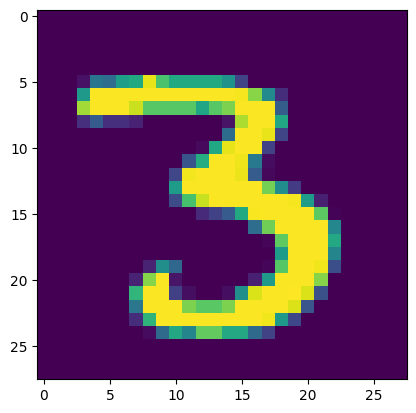

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [ ]:
x_train = np.where(x_train > 0, 1, 0)
x_test = np.where(x_test > 0, 1, 0)

In [ ]:
model = Sequential()

# model.add(Flatten(input_shape=(28,28))) # 784 outputs
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9731 - loss: 0.1081 - val_accuracy: 0.9625 - val_loss: 0.1827
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9780 - loss: 0.0736 - val_accuracy: 0.9627 - val_loss: 0.1868
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0541 - val_accuracy: 0.9644 - val_loss: 0.1695
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9843 - loss: 0.0465 - val_accuracy: 0.9602 - val_loss: 0.1816
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9882 - loss: 0.0356 - val_accuracy: 0.9632 - val_loss: 0.1834
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0310 - val_accuracy: 0.9644 - val_loss: 0.1789
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9916 - loss: 0.0243 - val_accuracy: 0.9656 - val_loss: 0.1743
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9918 - loss: 0.0237 - 

In [ ]:
from sklearn.metrics import accuracy_score

y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)

accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9651

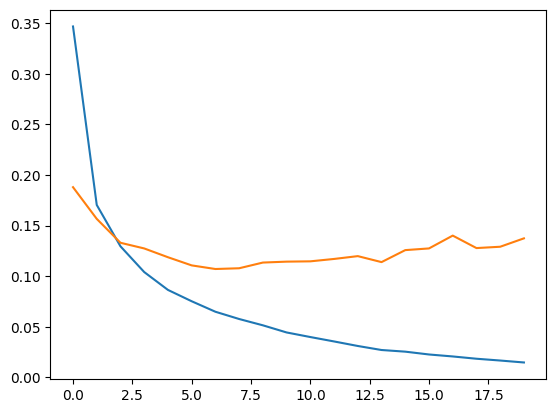

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

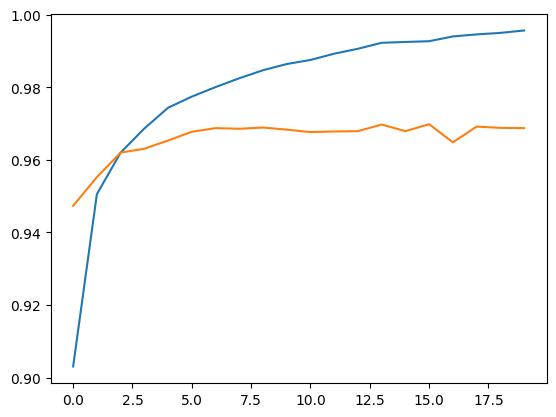

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
import numpy as np

class Layer:
    def __init__(self, weights, bias, activation='relu'):
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def activation_function(self, x):
        if self.activation == 'relu':
            return np.maximum(0, x)

        elif self.activation == 'softmax':
            return np.exp(x) / np.sum(np.exp(x), axis=0)

    def predict(self, inputs):
        return self.activation_function(np.dot(self.weights, inputs) + self.bias)

In [ ]:
weights = model.get_weights()

layer_1 = Layer(weights[0].T, weights[1].reshape(50, 1), activation='relu')
layer_2 = Layer(weights[2].T, weights[3].reshape(10, 1), activation='softmax')

In [ ]:
test_index = 3
layer_2.predict(layer_1.predict(x_test[test_index].reshape(784, 1))).argmax(), y_test[test_index]

(np.int64(0), np.uint8(0))

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
with open("model_weights_bw.ts", "w") as f:
    for i, weight in enumerate(weights):
        var_name = f"weight_{i}" if len(weight.shape) > 1 else f"bias_{i-1}"

        # Convert to string, remove newlines, clean spacing
        if len(weight.shape) > 1:
            js_array = np.array2string(weight.T, separator=',', max_line_width=np.inf)
        else:
            js_array = np.array2string(weight.T.reshape(weight.T.shape[0], 1), separator=',', max_line_width=np.inf)

        js_array = js_array.replace('\n', '').replace('  ', ' ').replace('[ ', '[').replace(' ]', ']')

        # Write JS export
        f.write(f"export const {var_name} = {js_array};\n\n")